In [23]:
import matplotlib.pyplot as plt
%matplotlib notebook
import kugupu as kgp
import numpy as np
import pathlib

In [46]:
datasets = {}

for f in pathlib.Path('.').glob('*.hdf5'):
    ds = kgp.load_results(str(f))

    name = str(f).split('_')[1]
    
    datasets[name] = ds

In [50]:
lives = {}
for nm, ds in datasets.items():
    lives[nm] = kgp.time.determine_lifetimes(ds.H_frag, 0.001)

In [84]:
durs, obs = lives['C3']

In [87]:
durs.shape

(20687,)

In [55]:
names = ['C3', 'C6', 'C9', 'C12']

In [57]:
for nm in names:
    print(nm, lives[nm][0].mean())

C3 1.4973171557016485
C6 1.3440250342264815
C9 1.3415233415233416
C12 1.2770064341347782


The C3 sidechain consistently has more contacts of all durations.

<IPython.core.display.Javascript object>


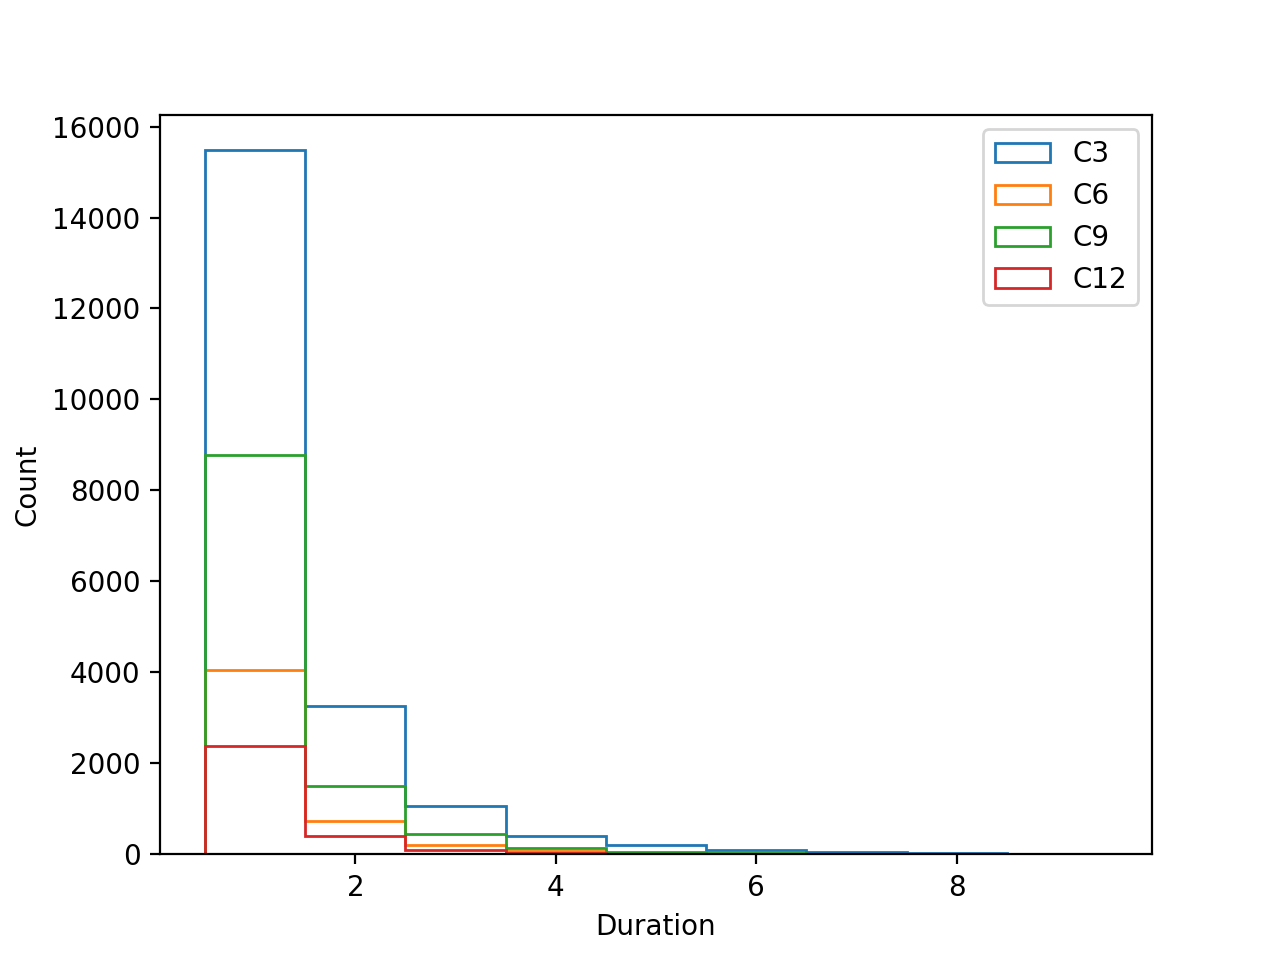

Text(0.5, 0, 'Duration')

In [71]:
fig, ax = plt.subplots()

for nm in names:
    dur, obs = lives[nm]
    
    ax.hist(dur, bins=np.arange(10) + 0.5, histtype='step', label=nm)
ax.legend()
ax.set_ylabel('Count')
ax.set_xlabel('Duration')

When normalised, the propotions of each lifetime are similar across all side chain lengths.

<IPython.core.display.Javascript object>


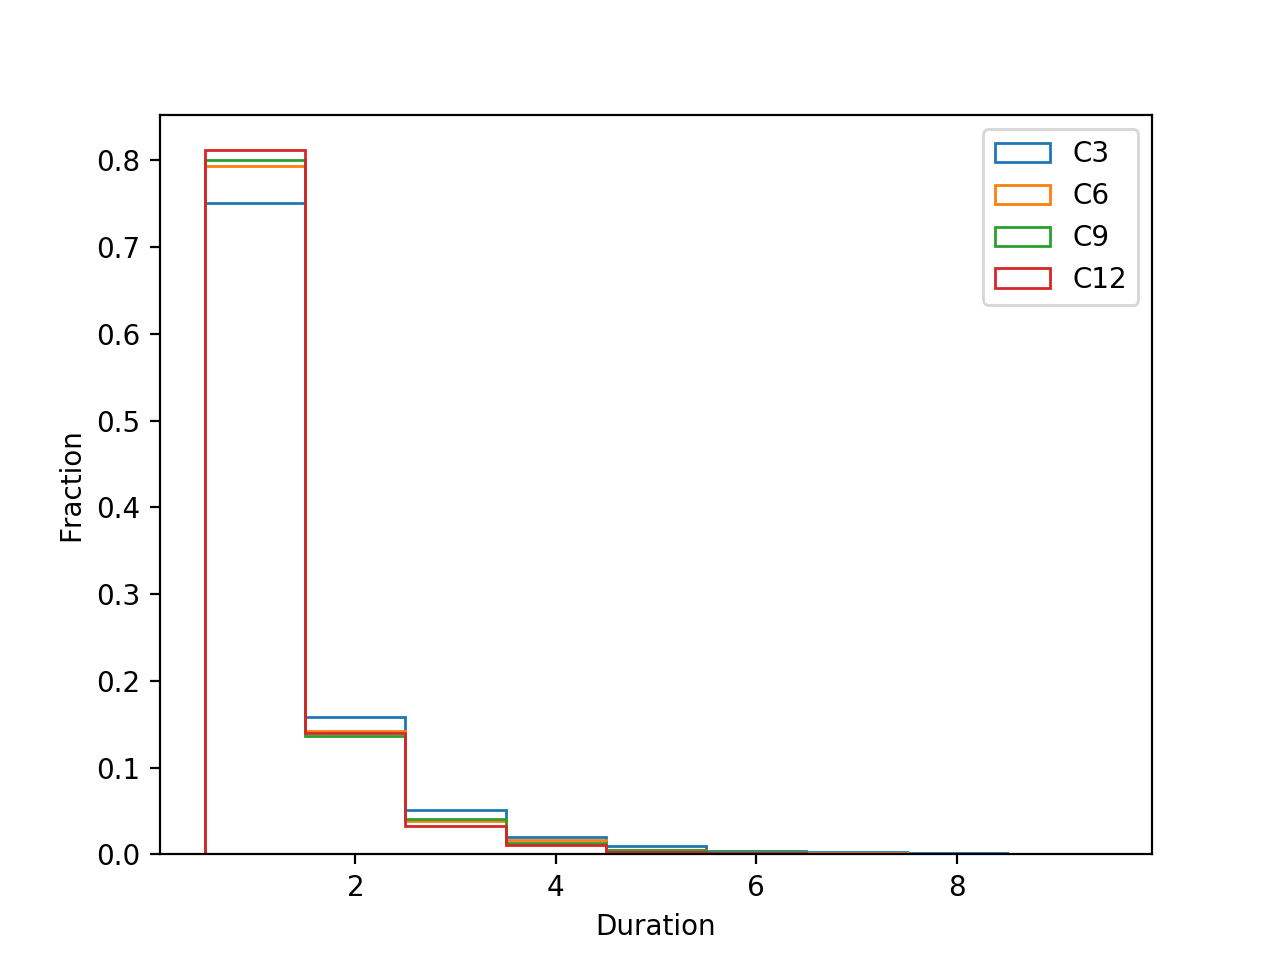

Text(0.5, 0, 'Duration')

In [72]:
fig, ax = plt.subplots()

for nm in names:
    dur, obs = lives[nm]
    
    ax.hist(dur, bins=np.arange(10) + 0.5, histtype='step', label=nm, normed=True)
ax.legend()
ax.set_ylabel('Fraction')
ax.set_xlabel('Duration')

In [77]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(dur, event_observed=obs)  

<lifelines.KaplanMeierFitter: fitted with 2953 observations, 139 censored>

<IPython.core.display.Javascript object>


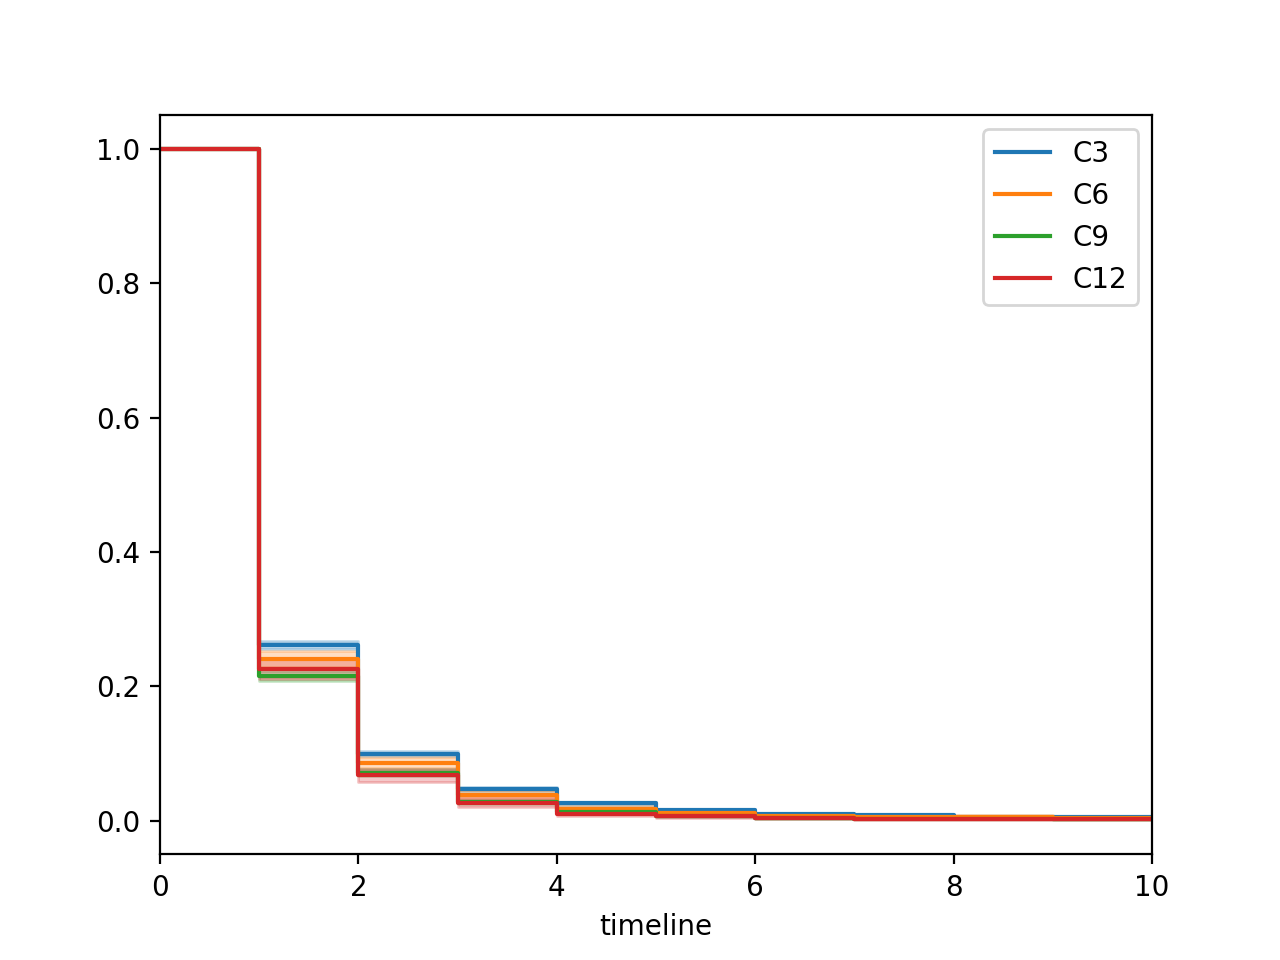

(0, 10)

In [81]:
fig, ax = plt.subplots()

for nm in names:
    dur, obs = lives[nm]
    
    kmf = KaplanMeierFitter()
    kmf.fit(dur, event_observed=obs)
    
    kmf.plot(ax=ax, label=nm)
ax.legend()

ax.set_xlim(0, 10)